<a href="https://colab.research.google.com/github/SanvirVirdi24/Loan_grading_System-/blob/main/Loan_grading_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/DATASETT.csv')

# Display initial dataset information
print("Initial Data Overview:")
print(data.info())
print(data.describe())
print(data.head())

# Handling missing values
# Fill categorical columns with the mode (most common value)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Fill numerical columns with the median
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Check if all missing values are handled
print("\nData After Null Handling:")
print(data.isnull().sum())


Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    int64  
 9   Loan_Amount_Term   367 non-null    int64  
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 34.5+ KB
None
       ApplicantIncome  CoapplicantIncome    LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  3.670000e+02

<ipython-input-2-ce091bae04bc>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-2-ce091bae04bc>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u


Gender Ratio (Male to Female): Gender
Male      0.809264
Female    0.190736
Name: proportion, dtype: float64

Education Ratio (Graduate to Non-Graduate): Education
Graduate        0.771117
Not Graduate    0.228883
Name: proportion, dtype: float64

Income to Loan Ratio:
count    367.000000
mean       0.009999
std        0.000004
min        0.009987
25%        0.009997
50%        0.009999
75%        0.010002
max        0.010013
Name: Income_to_Loan_Ratio, dtype: float64


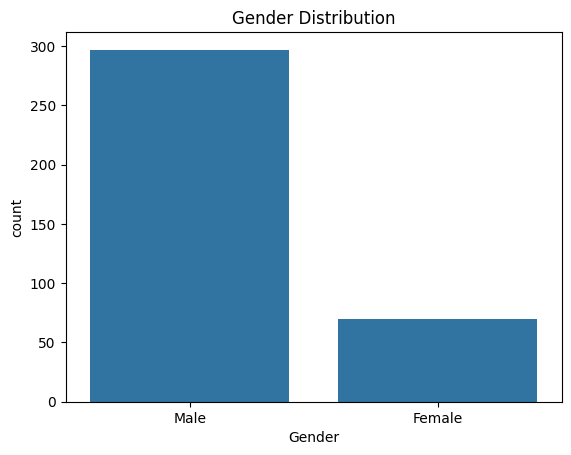

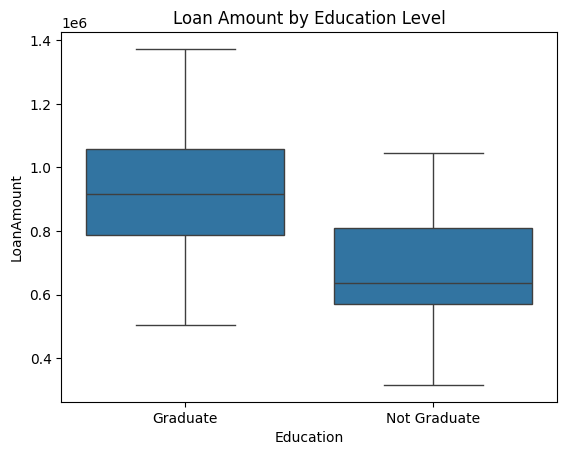

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender Ratio (Male:Female)
gender_ratio = data['Gender'].value_counts(normalize=True)
print("\nGender Ratio (Male to Female):", gender_ratio)

# Education Ratio (Graduate:Non Graduate)
education_ratio = data['Education'].value_counts(normalize=True)
print("\nEducation Ratio (Graduate to Non-Graduate):", education_ratio)

# Income-to-Loan Ratio
data['Income_to_Loan_Ratio'] = (data['ApplicantIncome'] + data['CoapplicantIncome']) / data['LoanAmount']
print("\nIncome to Loan Ratio:")
print(data['Income_to_Loan_Ratio'].describe())

# Visualization: Gender Distribution
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Visualization: Education and LoanAmount
sns.boxplot(x='Education', y='LoanAmount', data=data)
plt.title('Loan Amount by Education Level')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/path/to/loan_data.csv')

# Clean and preprocess the data
# Convert categorical variables to numerical values (if not done already)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].map({'Married': 1, 'Single': 0, 'Divorced': 0})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
data['Credit_History'] = data['Credit_History'].fillna(0)  # Fill missing values with 0 (No Credit History)

# Calculate meaningful ratios for insights
# Income-to-Loan Ratio
data['Income_Loan_Ratio'] = (data['ApplicantIncome'] + data['CoapplicantIncome']) / data['LoanAmount']

# Applicant-to-Coapplicant Income Ratio
data['Income_Ratio'] = data['ApplicantIncome'] / (data['CoapplicantIncome'] + 1)

# Loan-to-Term Ratio
data['Loan_Term_Ratio'] = data['LoanAmount'] / data['Loan_Amount_Term']

# Dependents-to-Income Ratio
data['Dependents_Ratio'] = data['Dependents'] / (data['ApplicantIncome'] + data['CoapplicantIncome'])

# Credit-to-Non-Credit Ratio
data['Credit_History_Ratio'] = data.groupby('Credit_History')['LoanAmount'].transform('count') / len(data)

# Income by Property Area
data['Income_by_Area'] = data.groupby('Property_Area')['ApplicantIncome'].transform('mean')


In [ ]:
# Income-to-Loan Ratio
data['Income_to_Loan_Ratio'] = (data['ApplicantIncome'] + data['CoapplicantIncome']) / data['LoanAmount']

# Applicant-to-Coapplicant Income Ratio
data['Applicant_to_Coapplicant_Ratio'] = data['ApplicantIncome'] / (data['CoapplicantIncome'] + 1)

# Dependents-to-Income Ratio
data['Dependents_to_Income_Ratio'] = data['Dependents'].replace('3+', 3).astype(int) / (data['ApplicantIncome'] + data['CoapplicantIncome'])

# Credit-to-Non-Credit Ratio
credit_ratio = data['Credit_History'].value_counts(normalize=True)
print("\nCredit to Non-Credit Ratio:", credit_ratio)

# Area-Based Income and Loan Ratio
area_income_loan = data.groupby('Property_Area').agg({'ApplicantIncome': 'mean', 'LoanAmount': 'mean'})
print("\nArea-Based Income and Loan Ratios:")
print(area_income_loan)

# Loan-to-Term Ratio
data['Loan_to_Term_Ratio'] = data['LoanAmount'] / data['Loan_Amount_Term']

# Self-Employed to Salaried Ratio
self_employed_ratio = data['Self_Employed'].value_counts(normalize=True)
print("\nSelf-Employed to Salaried Ratio:", self_employed_ratio)

# Summary
print("\nData with Calculated Ratios:")
print(data[['Income_to_Loan_Ratio', 'Applicant_to_Coapplicant_Ratio', 'Dependents_to_Income_Ratio', 'Loan_to_Term_Ratio']].head())



Credit to Non-Credit Ratio: Credit_History
1.0    0.839237
0.0    0.160763
Name: proportion, dtype: float64

Area-Based Income and Loan Ratios:
               ApplicantIncome     LoanAmount
Property_Area                                
Rural              7317.045045  866513.513514
Semiurban          7197.344828  852103.448276
Urban              7361.278571  884335.714286

Self-Employed to Salaried Ratio: Self_Employed
No     0.899183
Yes    0.100817
Name: proportion, dtype: float64

Data with Calculated Ratios:
   Income_to_Loan_Ratio  Applicant_to_Coapplicant_Ratio  \
0              0.010002                        2.717391   
1              0.010000                        3.827789   
2              0.010001                        2.956881   
3              0.010000                        3.941678   
4              0.009987                     3845.000000   

   Dependents_to_Income_Ratio  Loan_to_Term_Ratio  
0                    0.000221         7550.000000  
1                    0.

In [ ]:
# Simplified Ratio Calculations

# Income-to-Loan Ratio (applicant + coapplicant income divided by loan amount)
data['Income_to_Loan_Ratio'] = ((data['ApplicantIncome'] + data['CoapplicantIncome']) / data['LoanAmount']).round(2)

# Applicant-to-Coapplicant Income Ratio (applicant income relative to coapplicant income)
data['Applicant_to_Coapplicant_Ratio'] = (data['ApplicantIncome'] / (data['CoapplicantIncome'] + 1)).round(2)

# Dependents-to-Income Ratio (dependents as a proportion of total income)
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)
data['Dependents_to_Income_Ratio'] = (data['Dependents'] / (data['ApplicantIncome'] + data['CoapplicantIncome'])).round(4)

# Credit-to-Non-Credit Ratio
credit_ratio = data['Credit_History'].value_counts(normalize=True)
credit_ratio = credit_ratio.rename(index={1: 'With Credit History', 0: 'Without Credit History'})
print("\nCredit to Non-Credit Ratio:\n", credit_ratio)

# Area-Based Average Income and Loan Amount
area_income_loan = data.groupby('Property_Area').agg(
    Avg_ApplicantIncome=('ApplicantIncome', 'mean'),
    Avg_LoanAmount=('LoanAmount', 'mean')
).round(2)
print("\nAverage Income and Loan Amount by Area:\n", area_income_loan)

# Loan-to-Term Ratio (loan amount per month over loan term)
data['Loan_to_Term_Ratio'] = (data['LoanAmount'] / data['Loan_Amount_Term']).round(2)

# Self-Employed to Salaried Ratio
self_employed_ratio = data['Self_Employed'].value_counts(normalize=True).round(2)
self_employed_ratio = self_employed_ratio.rename(index={'Yes': 'Self-Employed', 'No': 'Salaried'})
print("\nSelf-Employed to Salaried Ratio:\n", self_employed_ratio)

# Summary of Calculated Ratios
summary_ratios = data[['Income_to_Loan_Ratio', 'Applicant_to_Coapplicant_Ratio', 'Dependents_to_Income_Ratio', 'Loan_to_Term_Ratio']].head()
print("\nSummary of Calculated Ratios:\n", summary_ratios)



Credit to Non-Credit Ratio:
 Credit_History
With Credit History       0.839237
Without Credit History    0.160763
Name: proportion, dtype: float64

Average Income and Loan Amount by Area:
                Avg_ApplicantIncome  Avg_LoanAmount
Property_Area                                     
Rural                      7317.05       866513.51
Semiurban                  7197.34       852103.45
Urban                      7361.28       884335.71

Self-Employed to Salaried Ratio:
 Self_Employed
Salaried         0.9
Self-Employed    0.1
Name: proportion, dtype: float64

Summary of Calculated Ratios:
    Income_to_Loan_Ratio  Applicant_to_Coapplicant_Ratio  \
0                  0.01                            2.72   
1                  0.01                            3.83   
2                  0.01                            2.96   
3                  0.01                            3.94   
4                  0.01                         3845.00   

   Dependents_to_Income_Ratio  Loan_to_Term_

In [ ]:
def grade_customers(data):
    conditions = [
        (data['ApplicantIncome'] > 5000) & (data['Credit_History'] == 1),
        (data['ApplicantIncome'] > 3000) & (data['Credit_History'] == 1),
        (data['ApplicantIncome'] > 2000),
        (data['ApplicantIncome'] <= 2000)
    ]
    grades = ['A', 'B', 'C', 'D']
    data['Grade'] = np.select(conditions, grades)
    return data

# Apply grading
data = grade_customers(data)


In [ ]:
# Function to assign banks based on grade
def assign_bank(grade):
    if grade == 'A':
        return 'ABC Bank'
    elif grade == 'B':
        return 'XYZ Bank'
    elif grade == 'C':
        return 'LMN Bank'
    else:
        return 'No Bank Available'

# Apply bank assignment
data['Bank_Assigned'] = data['Grade'].apply(assign_bank)
print("\nData with Assigned Banks:")
print(data[['Loan_ID', 'Grade', 'Bank_Assigned']].head())



Data with Assigned Banks:
    Loan_ID Grade Bank_Assigned
0  LP001015     A      ABC Bank
1  LP001022     A      ABC Bank
2  LP001031     A      ABC Bank
3  LP001035     A      ABC Bank
4  LP001051     B      XYZ Bank


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/DATASETT.csv')

# Define function to assign grade and bank
def assign_grade_and_bank(row):
    if row['Credit_History'] == 1 and row['ApplicantIncome'] > 5000 and row['LoanAmount'] < 200:
        return 'A', 'Bank ABC'
    elif row['Credit_History'] == 1 and row['ApplicantIncome'] > 3000:
        return 'B', 'Bank XYZ'
    elif row['Credit_History'] == 0 and row['ApplicantIncome'] > 3000:
        return 'C', 'Bank LMN'
    else:
        return 'D', 'Bank PQR'

# Apply grading and bank assignment
data[['Grade', 'Bank']] = data.apply(assign_grade_and_bank, axis=1, result_type="expand")

# Function to display the complete profile in a formatted way
def display_profile(profile):
    profile_data = profile.iloc[0]  # Get the row as a Series
    print("\n--- Customer Loan Profile ---")
    print(f"Loan ID           : {profile_data['Loan_ID']}")
    print(f"Gender            : {profile_data['Gender']}")
    print(f"Married           : {profile_data['Married']}")
    print(f"Dependents        : {profile_data['Dependents']}")
    print(f"Education         : {profile_data['Education']}")
    print(f"Self Employed     : {profile_data['Self_Employed']}")
    print(f"Applicant Income  : {profile_data['ApplicantIncome']}")
    print(f"Coapplicant Income: {profile_data['CoapplicantIncome']}")
    print(f"Loan Amount       : {profile_data['LoanAmount']}")
    print(f"Loan Term         : {profile_data['Loan_Amount_Term']}")
    print(f"Credit History    : {profile_data['Credit_History']}")
    print(f"Property Area     : {profile_data['Property_Area']}")
    print(f"Assigned Grade    : {profile_data['Grade']}")
    print(f"Eligible Bank     : {profile_data['Bank']}")
    print("\n--- End of Profile ---\n")

# Function to fetch profile by Loan ID
def fetch_profile(loan_id):
    profile = data[data['Loan_ID'] == loan_id]
    if not profile.empty:
        display_profile(profile)
    else:
        print("\nLoan ID not found. Please check and try again.\n")

# Main menu function
def main_menu():
    print("\n==============================")
    print("  Welcome to the Loan Profile and Grading System  ")
    print("==============================")

    print("\nAvailable Loan IDs:", ", ".join(data['Loan_ID'].unique()))

    while True:
        print("\n--- Main Menu ---")
        print("1. View Profile and Grade by Loan ID")
        print("2. Exit")
        print("-----------------")

        choice = input("Enter your choice (1 or 2): ").strip()

        if choice == '1':
            loan_id = input("\nEnter Loan ID: ").strip()
            print("\nFetching profile for Loan ID:", loan_id)
            fetch_profile(loan_id)
        elif choice == '2':
            print("\nThank you for using the Loan Profile System. Goodbye!")
            print("==============================\n")
            break
        else:
            print("\nInvalid choice. Please select 1 or 2.\n")

# Run the main menu
main_menu()



  Welcome to the Loan Profile and Grading System  

Available Loan IDs: LP001015, LP001022, LP001031, LP001035, LP001051, LP001054, LP001055, LP001056, LP001059, LP001067, LP001078, LP001082, LP001083, LP001094, LP001096, LP001099, LP001105, LP001107, LP001108, LP001115, LP001121, LP001124, LP001128, LP001135, LP001149, LP001153, LP001163, LP001169, LP001174, LP001176, LP001177, LP001183, LP001185, LP001187, LP001190, LP001203, LP001208, LP001210, LP001211, LP001219, LP001220, LP001221, LP001226, LP001230, LP001231, LP001232, LP001237, LP001242, LP001268, LP001270, LP001284, LP001287, LP001291, LP001298, LP001312, LP001313, LP001317, LP001321, LP001323, LP001324, LP001332, LP001335, LP001338, LP001347, LP001348, LP001351, LP001352, LP001358, LP001359, LP001361, LP001366, LP001368, LP001375, LP001380, LP001386, LP001400, LP001407, LP001413, LP001415, LP001419, LP001420, LP001428, LP001445, LP001446, LP001450, LP001452, LP001455, LP001466, LP001471, LP001472, LP001475, LP001483, LP00148